

## Lab 2

Welcome to the second lab of the AIML!
In addition to implementing code, there will be questions that you must answer which relate to the lab and your implementation. Each question you will answer is preceded by a **'Question X'** header. Carefully read each question and provide you answer or code in the following textboxes with **'Answer:'** header. Your lab submission will be evaluated based on your answers to each of the questions and the implementation you provide.

# Every question is of 1 mark.

## Hypothesis Testing

The purpose of the test is to tell if there is any significant difference between two data sets.



## Overview

This module covers,

1) One sample and Two sample t-tests

2) ANOVA

3) Type I and Type II errors

4) Chi-Squared Tests

5) Linear Regression

## Question 1 

*A student is trying to decide between two GPUs. He want to use the GPU for his research to run Deep learning algorithms, so the only thing he is concerned with is speed.*

*He picks a Deep Learning algorithm and a large data set and runs it on both GPUs 15 times, timing each run in hours. Results are given in the below lists GPU1 and GPU2.*

In [268]:
import pandas as pd
GPU1 = pd.DataFrame([11,9,10,11,10,12,9,11,12,9,11,12,9,10,9])
GPU2 = pd.DataFrame([11,13,10,13,12,9,11,12,12,11,12,12,10,11,13])

#Assumption: Both the datasets (GPU1 & GPU 2) are random, independent, parametric & normally distributed

Hint: You can import ttest function from scipy to perform t tests 

Given,

Null Hypothesis : There is no significant difference between data sets

Alternate Hypothesis : There is a significant difference

*Do two-sample testing and check whether to reject Null Hypothesis or not.*

#### Answer:

Two Sample T Test for Unpaired Data 

Null and Alternate Hypothesis: 
    # 𝐻0 : 𝜇GPU1 - 𝜇GPU2 = 0
    # 𝐻𝐴: 𝜇GPU1 - 𝜇GPU2 ≠ 0
    
Significane Level : 
    𝛼  = 0.05

In [269]:
from scipy.stats import  ttest_1samp,ttest_ind, ttest_ind_from_stats
import scipy.stats as stats  
from statsmodels.stats.power import  ttest_power

In [270]:
t_statistic, p_value  =  stats.ttest_ind(GPU1,GPU2)
print("P Value is :", p_value)
print(t_statistic)

P Value is : [0.01379428]
[-2.62762951]


###  PValue (0.013794280 is < 𝛼( 5%) and hence the decision is to reject the null hypothesis: (𝐻0 : 𝜇GPU1 - 𝜇GPU2 = 0) @ 5% significance. 

## Question 2 

He is trying a third GPU - GPU3.

In [271]:
GPU3 = pd.DataFrame([9,10,9,11,10,13,12,9,12,12,13,12,13,10,11])

#Assumption: Both the datasets (GPU1 & GPU 3) are random, independent, parametric & normally distributed

*Do two-sample testing and check whether there is significant differene between speeds of two GPUs GPU1 and GPU3.*

#### Answer:

Null and Alternate Hypothesis: 
    # 𝐻0 : 𝜇GPU1 - 𝜇GPU3 = 0
    # 𝐻𝐴: 𝜇GPU1 - 𝜇GPU3 ≠ 0
    
Significane Level : 
    𝛼  = 0.05

In [272]:
t_statistic, p_value  =  stats.ttest_ind(GPU1,GPU3)
print("P Value is :", p_value)

P Value is : [0.14509211]


### PValue (0.14509211 is > 𝛼( 5%) and hence we fail to reject the null hypothesis: (𝐻0 : 𝜇GPU1 - 𝜇GPU2 = 0) @ 5% significance. 

### ANOVA

## Question 3 

If you need to compare more than two data sets at a time, an ANOVA is your best bet. 

*The results from three experiments with overlapping 95% confidence intervals are given below, and we want to confirm that the results for all three experiments are not significantly different.*

#Assumption: All the 3 datasets (e1,e2 & e3) are random, independent, parametric & normally distributed
But before conducting ANOVA, test equality of variances (using Levene's test) is satisfied or not. If not, then mention that we cannot depend on the result of ANOVA

In [273]:
import pandas as pd
e1 = pd.DataFrame({ 'Exp_No': '1', 'Results' : [1.595440,1.419730,0.000000,0.000000]})
e2 = pd.DataFrame({'Exp_No': '2', 'Results' : [1.433800,2.079700,0.892139,2.384740]})
e3 = pd.DataFrame({'Exp_No': '3', 'Results' : [0.036930,0.938018,0.995956,1.006970]})

#### Answer:

In [274]:
stats.levene(e1.Results,e2.Results,e3.Results)

LeveneResult(statistic=2.6741725711150446, pvalue=0.12259792666001798)

#### P-Value is > 0.05 and hence we can conclude equality of variance is satisfied and procede with ANOVA test. 

####  Since we want to prove that results from e1, e2, e3 are similar - assuming following Null and Alternal Hypothesis: 

    ### H0 : Alteast 1 Mu is different
    ### HA : Mue1 = Mue2 = Mue3 

In [275]:
experiment = pd.DataFrame()
experiment = experiment.append(e1)
experiment = experiment.append(e2)
experiment = experiment.append(e3)

In [276]:
#print(experiment)

In [277]:
crit = stats.f.ppf(q = .95, dfn = 2, dfd = 11)
#dfn is a-1 : number of groups - 1
#dfd is N-1 : number of elements in the sample - 1
print('F critical value for 2 and 60 df with .95 confidence is %3.2f' %crit)

F critical value for 2 and 60 df with .95 confidence is 3.98


In [278]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Results ~ Exp_No', data = experiment).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

            sum_sq   df         F    PR(>F)
Exp_No    2.399066  2.0  2.513576  0.135746
Residual  4.294994  9.0       NaN       NaN


For the given Sample, calculated value of F (2.513576) is less than Critical value (3.98),so the statistical decision is to reject the null hypothesis at 5% level of significance.

#### So there is sufficient evidence to reject the null hypothesis that at least one mean result of the experiment is different from others

## Question 4 

*In one or two sentences explain about **TypeI** and **TypeII** errors.*

#### Answer:

#### Type I error : Where null hypothesis is true but is rejected. In common terms it is called as False Positive. Significance value we set for a hypothesis test has a  corelation with the probability of type 1 Error.  

#### Type II error :  Where null hypothesis is accepted but in reality it should have been rejected. In common terms it is called as False negative. Sample size of the test has a  corelation with probabilty of type 2 Error. 

## Question 5 

Explain how the higher confidence value effects TypeI and TypeII error.

#### Answer:


#### Increase in / Higher confidence level(lower alpha value) reduces the proability of type I error. At the same time it makes it difficult to reject a null hypothesis which in turn increases the proability of Type II error. 

## Question 6 

*A computer expert wants to test the null hypothesis that a new GPU is no more effective than the older model.*

Lets consider that he selects the GPU which he think is more effective.

Now, find out which GPU he has selected if he made Type I error. And give reasoning about which is more effective.

**Answer:**

#### As per the statement 

     H0 : MuNewGPU > MuoldGPU
     HA: MuNewGPU <= MuoldGPU

#### If he has made a type 1 error he has rejected H0 instead of failing to reject and concluded that there is no significant effeciency improvement in NewGPU. He would have selected OLD GPU. 

#### In reality the test demonstrates statistically  that New GPU is significantly effecient than the OLD GPU 

## Question 7 

From question6, if he made Type II error.

*Now, find out which GPU he has selected. And give reasoning about which is more effective.*

#### Answer:

#### If he has made a type 2 error he failed to rejected H0 instead of rejecting H0 and concluded that New GPU is significantly effeicient than Old GPU. He would have selected New GPU. 

#### In reality the test demonstrates statistically that New GPU is NOT significantly effecient than the OLD GPU 

# Linear Regression


# Simple Linear Regression

## Dataset

Population of U.S. Cities

### Description
The bigcity data frame has 49 rows and 2 columns.

The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken from the 196 largest cities in 1920.

### Format
This data frame contains the following columns:

`u`
The 1920 population.

`x`
The 1930 population.

Source

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press.

# Question 8 
Read the dataset given in file named 'bigcity.csv'.

In [279]:
usa = pd.read_csv("bigcity.csv")
usa.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


# Question 9 - Transform the dataset 
Find the number of rows in given dataset and separate the input and target variables into X and Y.
Hint: You can shape function to get the size of the dataframe

In [280]:
usa.shape

(49, 3)

In [281]:
#dropping the index Column
usa = usa.drop("Unnamed: 0", axis = 1)

In [282]:
u = usa[["u"]]
x = usa[["x"]]
print(u.head())
print(x.head())

     u
0  138
1   93
2   61
3  179
4   48
     x
0  143
1  104
2   69
3  260
4   75


## Question 10 - Check the dataset for any missing values and also print out the correlation matrix 

You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [283]:
usa.isna()

,u,x
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


In [284]:
usa.corr()

,u,x
u,1.000000,0.981742
x,0.981742,1.000000


### The high correlation between u and x indicates that the variable u is a good predictor of variable x

# Question 11 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.*

Check: train_test_split function

In [285]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
linreg = LinearRegression()

In [286]:
utrain, utest, xtrain, xtest = train_test_split(u, x, test_size=0.2, random_state=1)
print("Shape of training sets source & target : ", utrain.shape , xtrain.shape)
print("Shape of test sets source & target : ", utest.shape , utest.shape)

Shape of training sets source & target :  (39, 1) (39, 1)
Shape of test sets source & target :  (10, 1) (10, 1)


# Question 12 - Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.

Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [287]:
linreg.fit(utrain, xtrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [288]:
linreg.coef_


array([[1.15945123]])

In [289]:
linreg.intercept_

array([9.71845532])

# Question 13 - Linear Relationship between feature and target 
Plot the line with b1 and b0 as slope and y-intercept.

#### With the above values we can derive the following equation for the slope: 
      x = (1.159*u) + 9.71845532

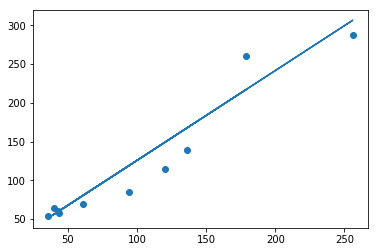

In [290]:
xtestpredict = linreg.predict(utest)
plt.scatter(utest, xtest)
plt.plot(utest, xtestpredict)
#print(xtestpredict)

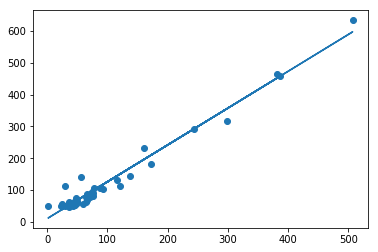

In [291]:
xtrainpredict = linreg.predict(utrain)
plt.scatter(utrain, xtrain)
plt.plot(utrain, xtrainpredict)

# Question 14 - Evaluation of model with scikit-learn 
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean square error over mean square error gives you root mean square error

In [292]:
from sklearn import metrics
import numpy as np

In [293]:
rmse_train = np.sqrt(metrics.mean_squared_error(xtrainpredict, xtrain))
rmse_test = np.sqrt(metrics.mean_squared_error(xtestpredict, xtest))
print("RMSE of Training Set :" , rmse_train)
print("RMSE of Test Set :", rmse_test)

RMSE of Training Set : 23.18943724391406
RMSE of Test Set : 23.385235190249123


In [294]:
model = linreg.fit(u,x)
print("Accuracy of the model on the sample ", model.score(u,x))

Accuracy of the model on the sample  0.963817258548811


## Question 15 - Calculate the accuracy of the model for both training and test data set 

### Hint: .score() function 

In [295]:
print("Accuracy of the model on the training Data set : ",  model.score(utrain, xtrain))

Accuracy of the model on the training Data set :  0.9680801983374648


In [296]:
print("Accuracy of the model on the training Data set : ",  model.score(utest, xtest))

Accuracy of the model on the training Data set :  0.921246186443079
